# Regressão Logistica Dataset Titanic

In [1]:
# Importando librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Importando dataset de treino e teste
train_dataset = pd.read_csv("/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_titanic/titanic/train.csv")
test_dataset = pd.read_csv("/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_titanic/titanic/test.csv")

In [3]:
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Pré processamento

In [4]:
# Visualiando dados faltantes
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

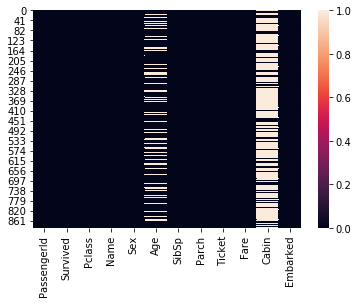

In [5]:
sns.heatmap(train_dataset.isnull())

In [6]:
train_dataset['Age'].median()

28.0

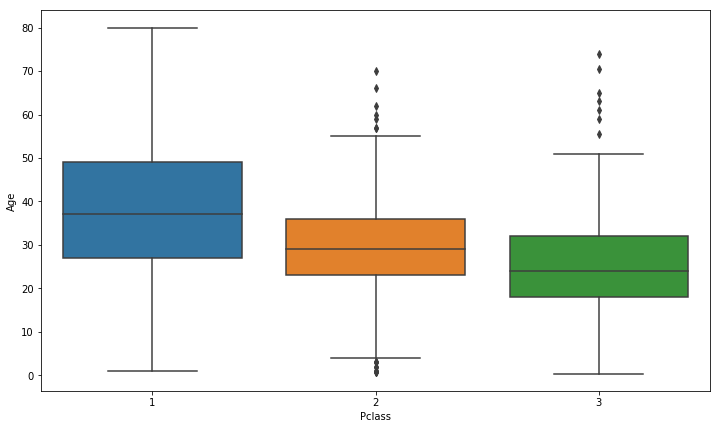

In [7]:
# boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_dataset, x = 'Pclass', y = 'Age')

In [8]:
# Substituindo NaN
train_dataset['Age'].fillna(train_dataset['Age'].median(), inplace = True)

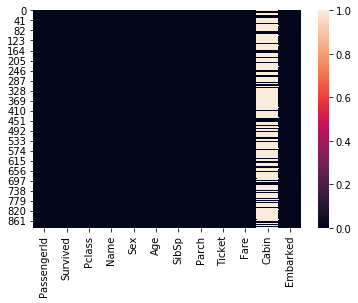

In [9]:
sns.heatmap(train_dataset.isnull())

In [10]:
# Tirando a coluna Cabin pois tem muitos valores NaN
train_dataset.drop(columns=['Cabin'], axis = 1, inplace=True)

In [11]:
# Apagando valores NaN
train_dataset.dropna(inplace=True)

In [12]:
# Convertendo variáveis categóricas em variáveis fictícias
train_dataset.info()
sex = pd.get_dummies(train_dataset['Sex'],drop_first=True)
embark = pd.get_dummies(train_dataset['Embarked'],drop_first=True)
train_dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train_dataset = pd.concat([train_dataset,sex,embark],axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Separando dados


In [20]:
Y = train_dataset['Survived']
X = train_dataset
X.drop(['Survived'], axis = 1, inplace = True)

In [22]:
Y.shape

(889,)

In [23]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [24]:
X.shape

(889, 9)

## Treinando o modelo e prevendo (Regressão Logística)

In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
preds = lg.predict(x_test)

/home/matheusjerico/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
preds[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

## Avaliando

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       141
           1       0.73      0.72      0.72        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[119  22]
 [ 23  59]]


In [33]:
print(lg.score(x_train, y_train))

0.8063063063063063


## Modelo com Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

1.0

## Avaliando

In [40]:
preds = rfc.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



In [41]:
print(confusion_matrix(y_test, preds))

[[120  21]
 [ 25  57]]
